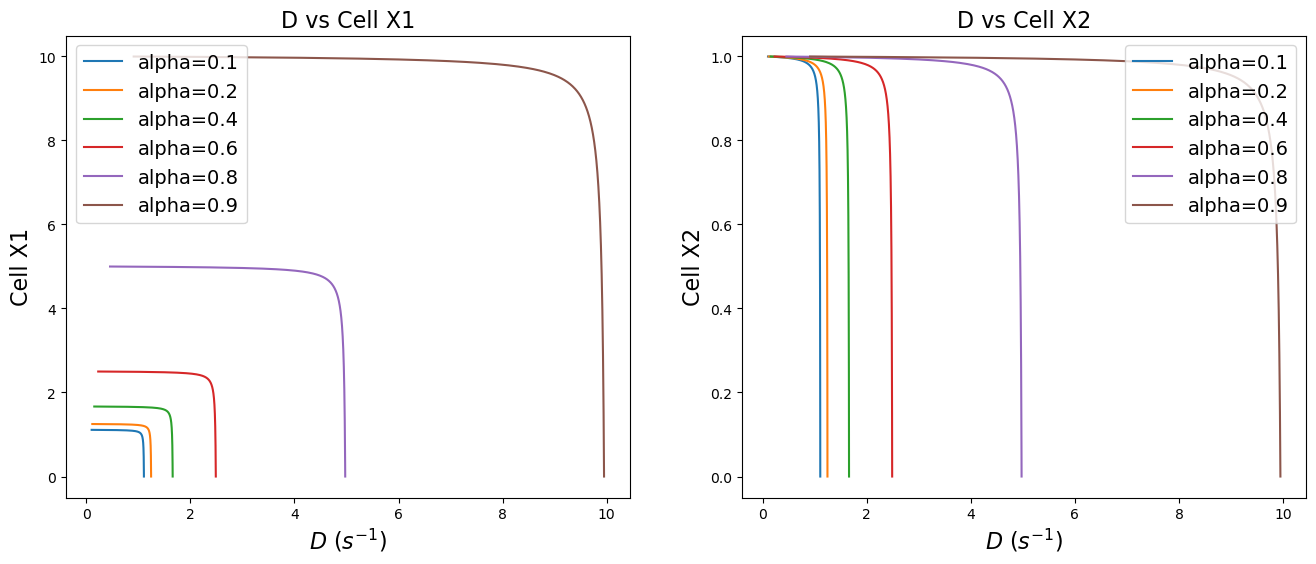

In [83]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 2
Yxs = 0.5
mu_m = 1
Ks = 0.01
alpha_range = np.array([0.1, 0.2, 0.4, 0.6, 0.8, 0.9])
C = 2

def mu(S):
    return mu_m * S / (S + Ks)

def mu_s(S):
    return mu(S) / Yxs
    
def D(S, alpha):
    return mu(S) / (1 + alpha * (1 - C))

def cellX1(S, alpha):
    return D(S, alpha) * (S0 - S) / mu_s(S)

def cellX2(S, alpha):
    return cellX1(S, alpha) * (1 + alpha * (1 - C))


S = np.linspace(0.001, 2, 1000)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for i, alph in enumerate(alpha_range):
    axs[0].plot(D(S, alph), cellX1(S, alph), label=f'alpha={alph}')
    axs[1].plot(D(S, alph), cellX2(S, alph), label=f'alpha={alph}')

axs[0].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[0].set_ylabel('Cell X1', fontsize=16)
axs[0].set_title('D vs Cell X1', fontsize=16)
axs[0].legend(fontsize=14)

axs[1].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[1].set_ylabel('Cell X2', fontsize=16)
axs[1].set_title('D vs Cell X2', fontsize=16)
axs[1].legend(fontsize=14)

plt.show()


C:\Users\jrjon\AppData\Local\Temp\ipykernel_4108\3518899672.py:15: RuntimeWarning: divide by zero encountered in divide
  return Ks*mu/(mu_m - mu)
C:\Users\jrjon\AppData\Local\Temp\ipykernel_4108\3518899672.py:21: RuntimeWarning: invalid value encountered in divide
  return Yxs*rs/mu


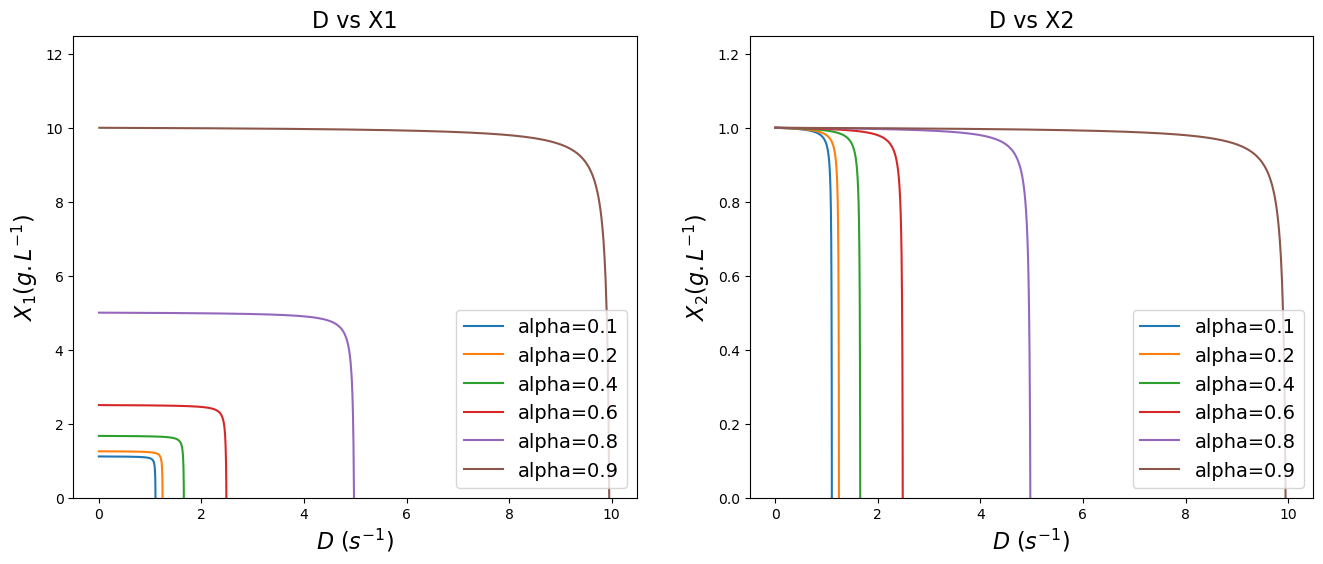

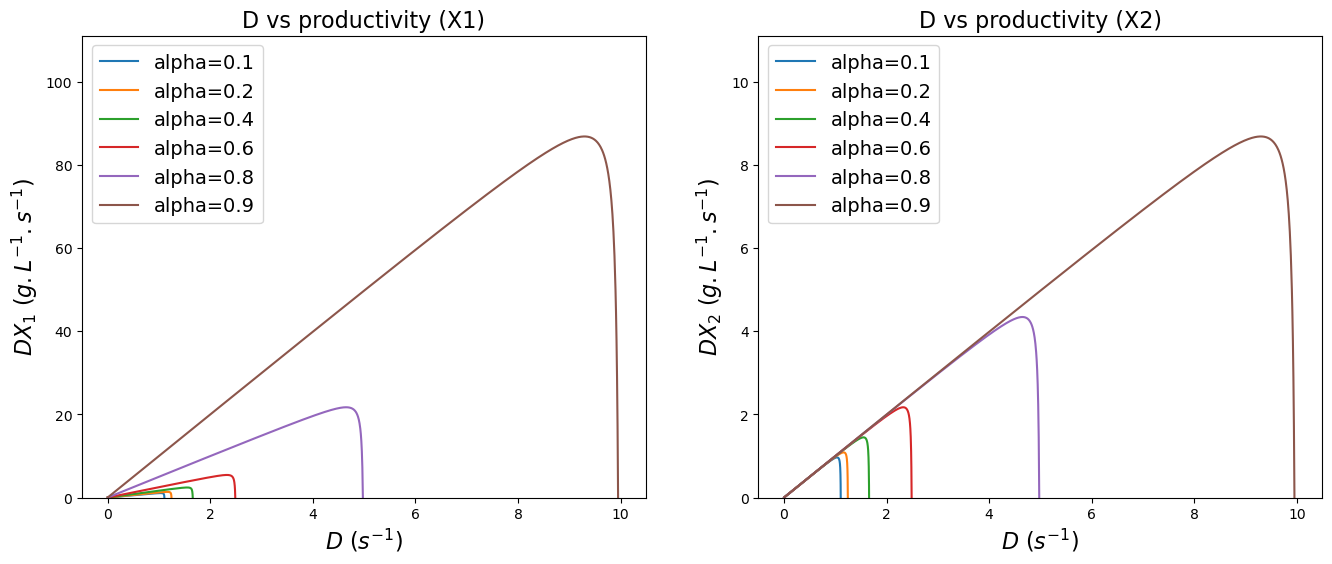

In [84]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 2
Yxs = 0.5
mu_m = 1
Ks = 0.01
alpha = np.array([0.1, 0.2, 0.4, 0.6, 0.8, 0.9])
C = 2

def calc_mu(D, alpha):
    return D*(1+alpha*(1-C))

def calc_S(mu):
    return Ks*mu/(mu_m - mu)

def calc_rs(D, S):
    return D*(S0 - S)

def calc_X1(rs, mu):
    return Yxs*rs/mu

def calc_X2(X1, alpha):
    return X1*(1 + alpha*(1 - C))

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for i, alph in enumerate(alpha):
    Dmax = mu_m/(1 + alph*(1 - C))
    D = np.linspace(0, Dmax, 1000)
    mu = calc_mu(D, alph)
    S = calc_S(mu)
    rs = calc_rs(D, S)
    X1 = calc_X1(rs, mu)
    X2 = calc_X2(X1, alph)

    axs[0].plot(D, X1, label=f'alpha={alph}')
    axs[1].plot(D, X2, label=f'alpha={alph}')

axs[0].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[0].set_ylabel(r'$X_1\ (g.L^{-1})$', fontsize=16)
axs[0].set_title('D vs X1', fontsize=16)
axs[0].set_ylim(0)
axs[0].legend(fontsize=14)

axs[1].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[1].set_ylabel(r'$X_2\ (g.L^{-1})$', fontsize=16)
axs[1].set_title('D vs X2', fontsize=16)
axs[1].set_ylim(0)
axs[1].legend(fontsize=14)

plt.show()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for i, alph in enumerate(alpha):
    Dmax = mu_m/(1 + alph*(1 - C))
    D = np.linspace(0, Dmax, 1000)
    mu = calc_mu(D, alph)
    S = calc_S(mu)
    rs = calc_rs(D, S)
    X1 = calc_X1(rs, mu)
    X2 = calc_X2(X1, alph)

    axs[0].plot(D, D*X1, label=f'alpha={alph}')
    axs[1].plot(D, D*X2, label=f'alpha={alph}')

axs[0].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[0].set_ylabel(r'$DX_1\ (g.L^{-1}.s^{-1})$', fontsize=16)
axs[0].set_title('D vs productivity (X1)', fontsize=16)
axs[0].set_ylim(0)
axs[0].legend(fontsize=14)

axs[1].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[1].set_ylabel(r'$DX_2\ (g.L^{-1}.s^{-1})$', fontsize=16)
axs[1].set_title('D vs productivity (X2)', fontsize=16)
axs[1].set_ylim(0)
axs[1].legend(fontsize=14)

plt.show()

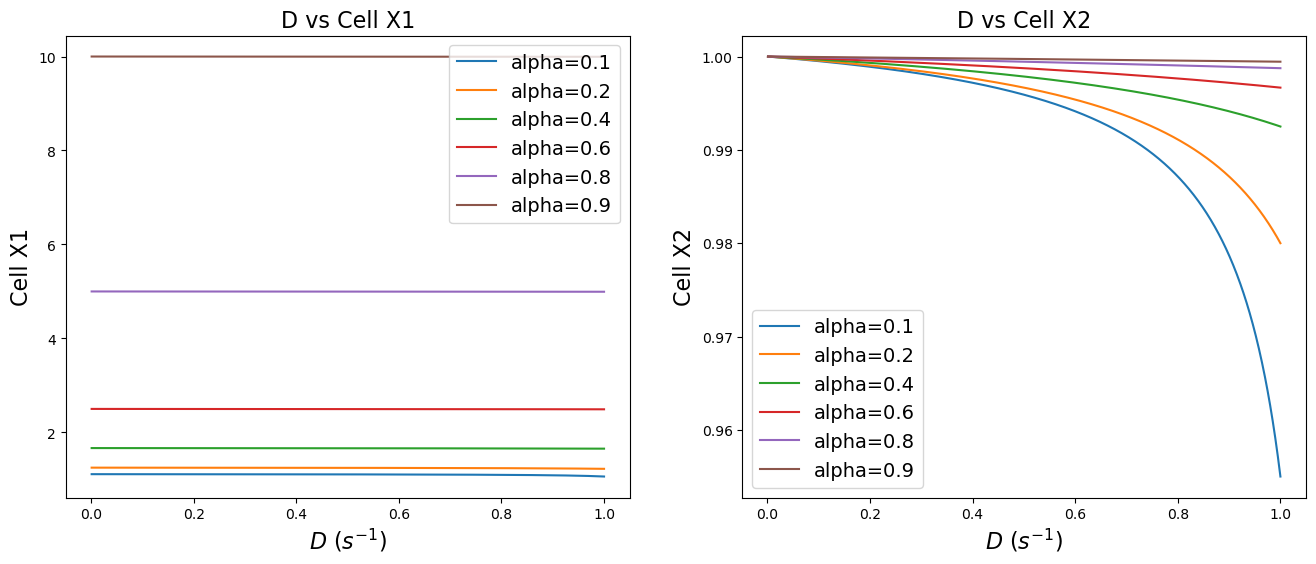

In [85]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 2
Yxs = 0.5
mu_m = 1
Ks = 0.01
alpha_range = np.array([0.1, 0.2, 0.4, 0.6, 0.8, 0.9])
C = 2

def mu(D, alpha):
    return D*(1+alpha*(1-C))

def mu_s(D, alpha):
    return mu(D, alpha) / Yxs

def S(D, alpha):
    return (D*Ks*(1+alpha*(1-C)))/(mu_m-D*(1+alpha*(1-C)))
    
def cellX1(D, alpha):
    return D * (S0 - S(D, alpha)) / mu_s(D, alpha)

def cellX2(D, alpha):
    return cellX1(D, alpha) * (1 + alpha * (1 - C))


D = np.linspace(0.001, 1, 1000)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for i, alph in enumerate(alpha_range):
    axs[0].plot(D, cellX1(D, alph), label=f'alpha={alph}')
    axs[1].plot(D, cellX2(D, alph), label=f'alpha={alph}')

axs[0].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[0].set_ylabel('Cell X1', fontsize=16)
axs[0].set_title('D vs Cell X1', fontsize=16)
axs[0].legend(fontsize=14)

axs[1].set_xlabel(r'$D\ (s^{-1})$', fontsize=16)
axs[1].set_ylabel('Cell X2', fontsize=16)
axs[1].set_title('D vs Cell X2', fontsize=16)
axs[1].legend(fontsize=14)

plt.show()
